# Intro

In this project different methods and algorithms of image quantization are shown

# Algorithms

In [1]:
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as m

# img_source = 'images/hills.jpeg'
# img_source = 'images/hills-underscaled.png'

# img_source = 'images/example.png'
img_source = 'images/example_underscaled.png'

# img_source = 'images/me.jpg'

**View images:**

Width: 154 pixels
Height: 213 pixels
Number of channels: 3
Image size: 98406 bytes
Image data type: uint8


(-0.5, 153.5, 212.5, -0.5)

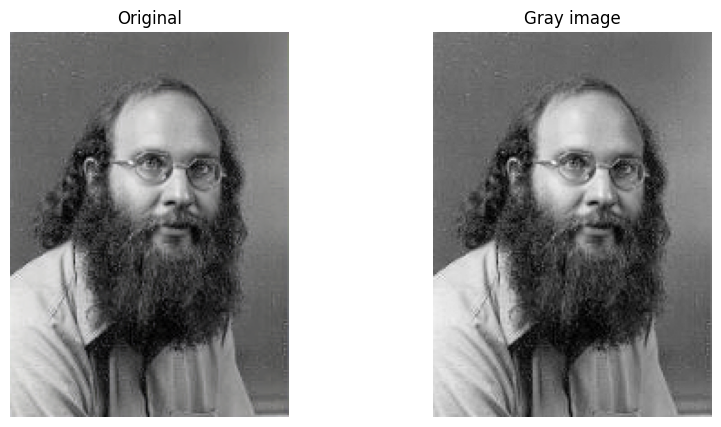

In [3]:
img = cv2.imread(img_source)
# plt.imshow(img)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image, cmap='gray')

height, width, channels = img.shape
print(f"Width: {width} pixels")
print(f"Height: {height} pixels")
print(f"Number of channels: {channels}")
print(f"Image size: {img.size} bytes")
print(f"Image data type: {img.dtype}")

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray image')
plt.axis('off')


## Uniform gray image quantization
level = 20

True

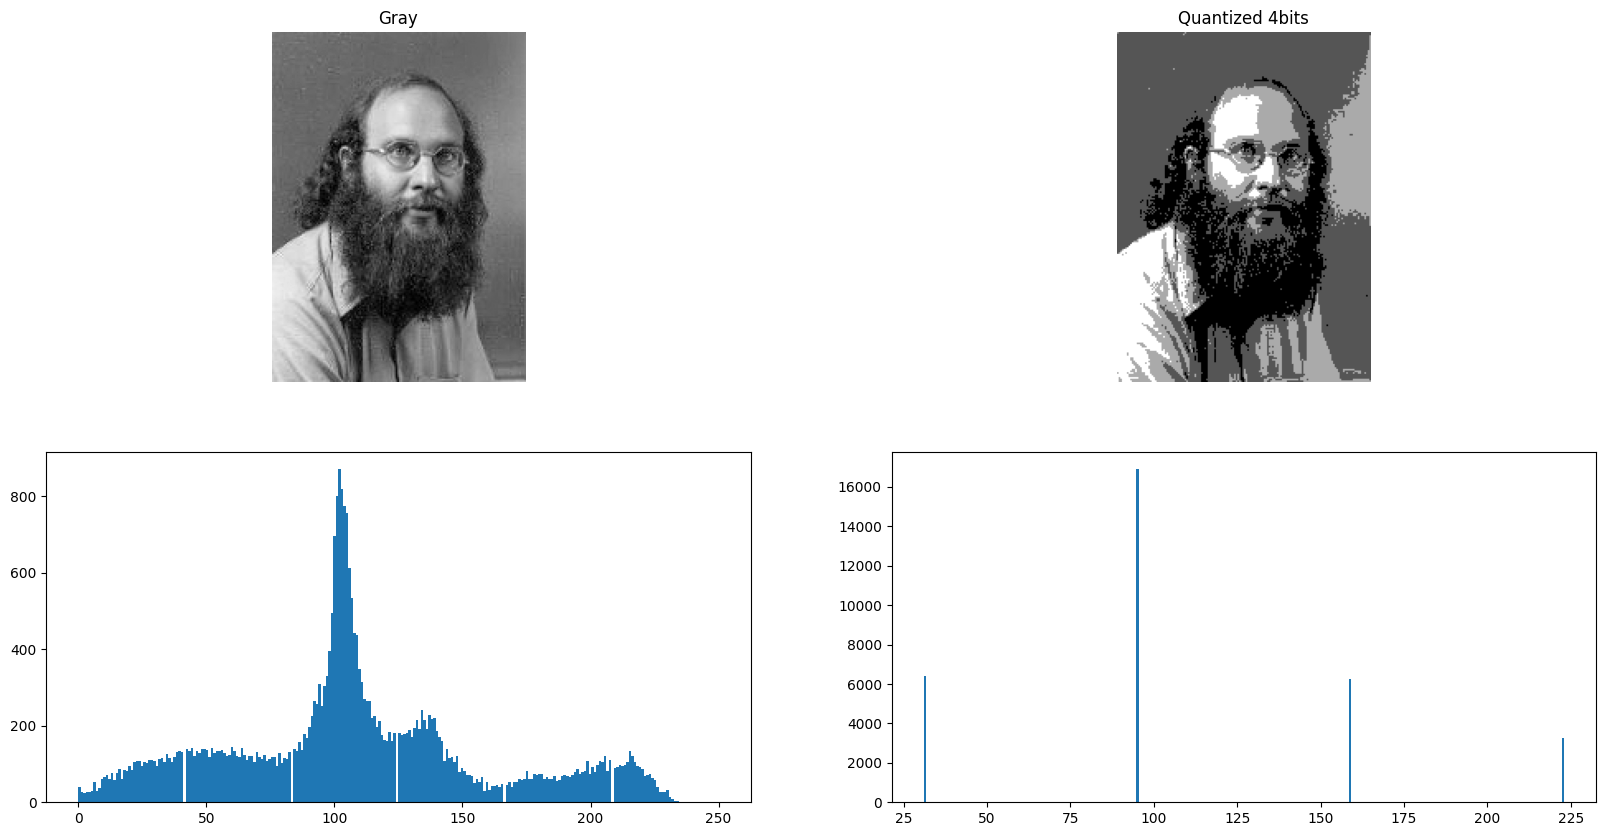

In [4]:
level = 4

quantized_image = np.array(gray_image).copy()
delta = 255/level
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        quantized_image[i][j] = int(np.floor(gray_image[i][j]/delta)*delta+delta/2)

plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Quantized {level}bits')
plt.axis('off')


plt.subplot(2,2,3)
_=plt.hist(gray_image.ravel(), bins=256)

plt.subplot(2,2,4)
_=plt.hist(quantized_image.ravel(), bins=256)

cv2.imwrite('images/gray_hills.jpeg',gray_image)
cv2.imwrite('images/quantized_gray_hills.jpeg',quantized_image)

## Median cut quantization

Median cut uses median color to split the range of colors into two and have average by them. Depth is used to identify amount of colors are wanted in result.

>Algorithm:
>1. Flatten image into one single array
>2. Find color with highest range
>3. Sort by this color
>4. Take median
>5. Split into buckets by median and repeat until desired depth
>6. For final 0-depth buckets define average color and set for image


https://web.archive.org/web/20190202154003/http://www.leptonica.com/papers/mediancut.pdf \
https://www.researchgate.net/publication/26339916_Optimal_image_quantization_perception_and_the_median_cut_algorithm

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def median_cut_quantize(img, img_arr): # set average color in bucket
    r_average = np.mean(img_arr[:,0])
    g_average = np.mean(img_arr[:,1])
    b_average = np.mean(img_arr[:,2])
    for data in img_arr:
        img[data[3]][data[4]] = [r_average, g_average, b_average]

# finding max-range color, sort by it to take median -> split into buckets by this median. Resulting with 2^depth buckets (colors)
def split_into_buckets(img, img_arr, depth): 
    if len(img_arr) == 0:
        return 
        
    if depth == 0:
        median_cut_quantize(img, img_arr)
        return
    
    r_range = np.max(img_arr[:,0]) - np.min(img_arr[:,0])
    g_range = np.max(img_arr[:,1]) - np.min(img_arr[:,1])
    b_range = np.max(img_arr[:,2]) - np.min(img_arr[:,2])
    max_range_space = (0 if r_range*2>g_range+b_range else 1 if g_range*2>b_range+r_range else 2)

    # sort by color
    img_arr = img_arr[img_arr[:,max_range_space].argsort()]
    median_index = int((len(img_arr)+1)/2) # bucket split index
    # print("median_index:", median_index)

    
    # split by median
    split_into_buckets(img, img_arr[0:median_index], depth-1)
    split_into_buckets(img, img_arr[median_index:], depth-1)

Initial number of colors: 5563
Resulting number of colors: 2


Text(0.5, 1.0, 'Histogram 2bits')

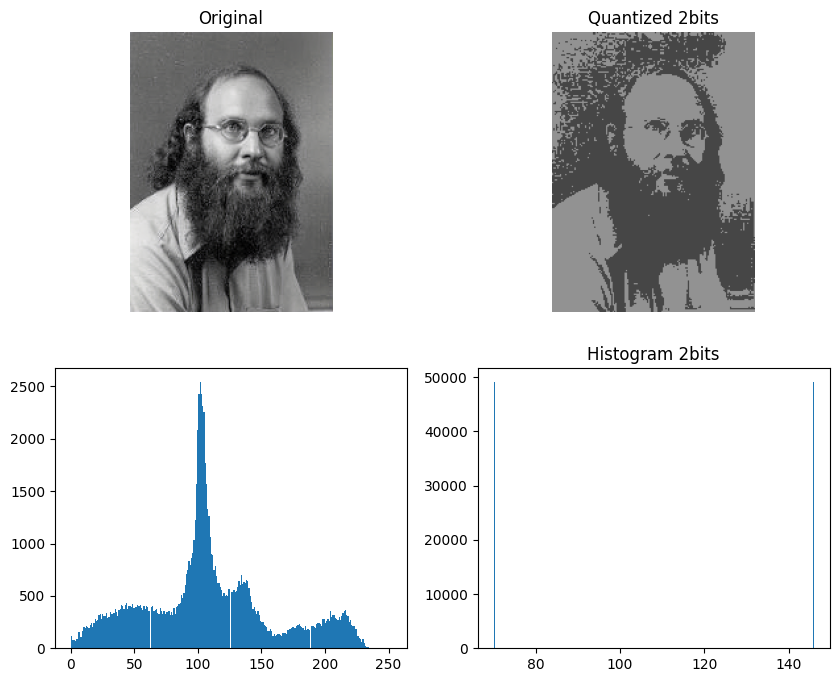

In [6]:
image = cv2.imread(img_source)
bits = 1

# list of pixels with their positions in image
flattened_img_array = []
for row_index, rows in enumerate(image):
    for color_index, color in enumerate(rows):
        flattened_img_array.append([color[0],color[1],color[2], row_index, color_index]) 
# print('len',len(flattened_img_array))


plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,3)
_=plt.hist(image.ravel(), bins=256)
print('Initial number of colors:', np.unique(image.reshape(-1, image.shape[-1]), axis=0).shape[0])

flattened_img_array = np.array(flattened_img_array)
split_into_buckets(image, flattened_img_array, bits)

plt.subplot(2,2,2)
plt.imshow(image,cmap='gray')
plt.title(f'Quantized {2**bits}bits')
plt.axis('off')

# print(np.unique(image.reshape(-1, image.shape[-1]), axis=0))
print('Resulting number of colors:', np.unique(image.reshape(-1, image.shape[-1]), axis=0).shape[0])

plt.subplot(2,2,4)
_=plt.hist(image.ravel(), bins=256)
plt.title(f'Histogram {2**bits}bits')

## Random dithering 1 bit

True

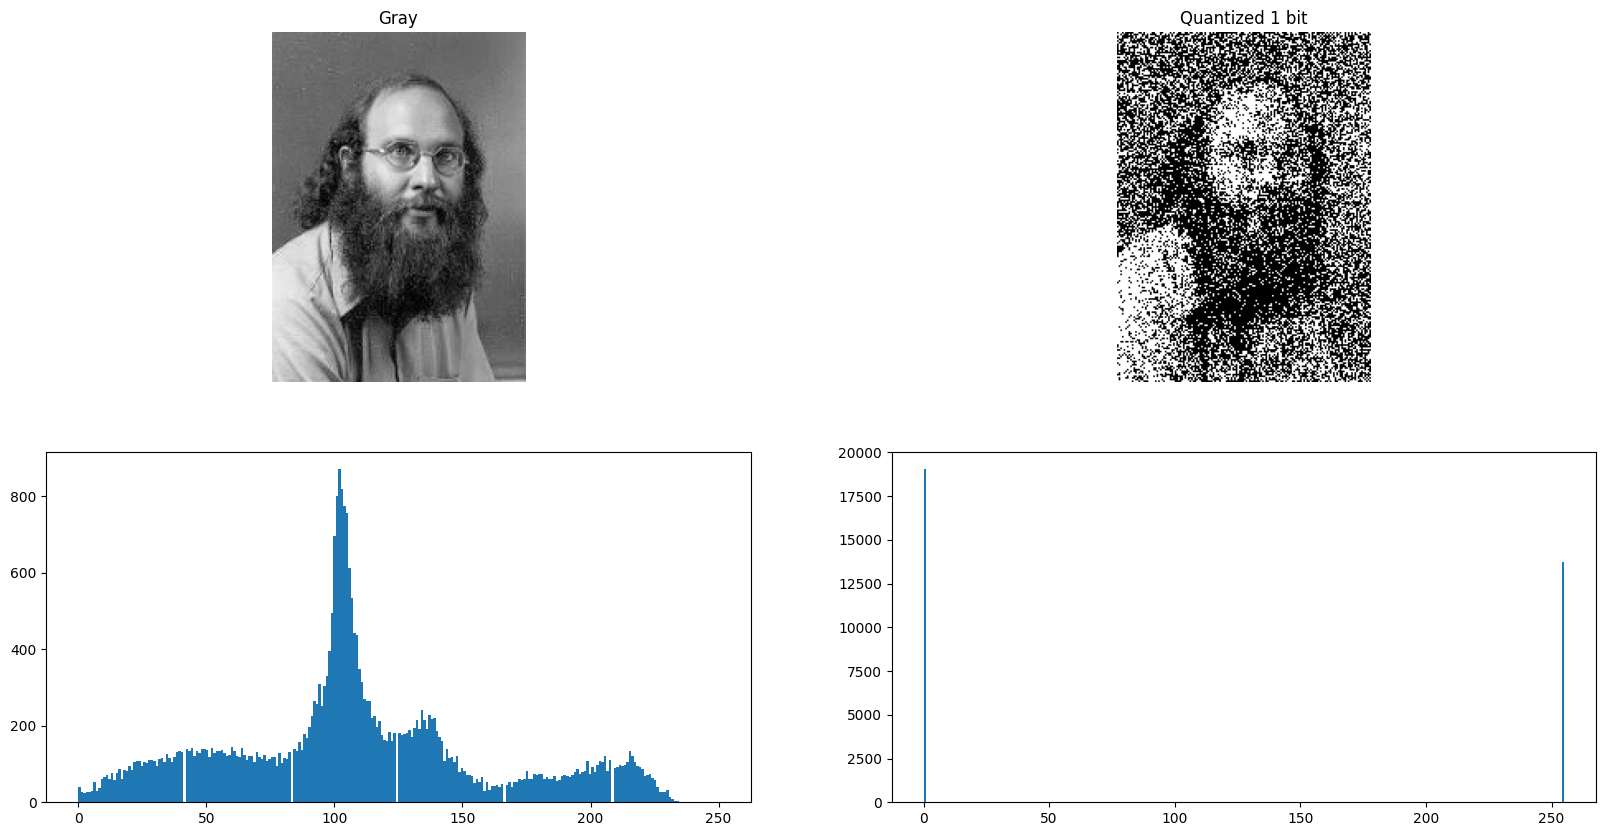

In [7]:
# level = 2
treshold = 127

image = cv2.imread(img_source)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

quantized_image = np.array(gray_image).copy()
# delta = 255/level
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        # quantized_image[i][j] = int(np.floor(gray_image[i][j]/delta)*delta+delta/2 + np.random.randint(-127,127))
        # quantized_image[i][j] = 255 if gray_image[i][j]>treshold else 0
        quantized_image[i][j] = 255 if gray_image[i][j]+np.random.randint(-127,127)>treshold else 0

plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Quantized 1 bit')
plt.axis('off')


plt.subplot(2,2,3)
_=plt.hist(gray_image.ravel(), bins=256)

plt.subplot(2,2,4)
_=plt.hist(quantized_image.ravel(), bins=256)

cv2.imwrite('images/gray_hills.jpeg',gray_image)
cv2.imwrite('images/quantized_gray_hills.jpeg',quantized_image)

## Ordered dithering uding Bayer's matrices | black-white palette

[[0.     0.5    0.125  0.625 ]
 [0.75   0.25   0.875  0.375 ]
 [0.1875 0.6875 0.0625 0.5625]
 [0.9375 0.4375 0.8125 0.3125]]


Text(0.5, 1.0, 'bayers results')

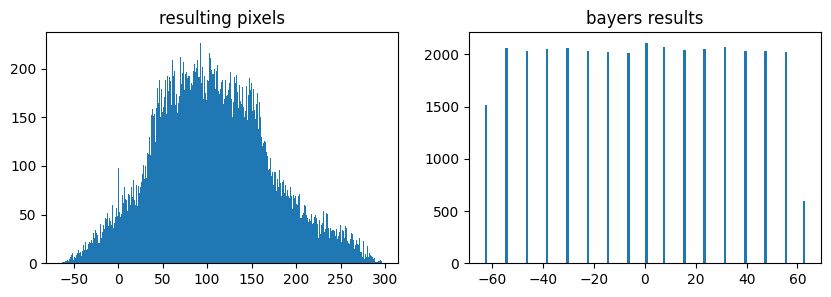

In [8]:
level = 2
# treshold = 127

image = cv2.imread(img_source)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def generate_bayer_matrix(n):
    size = 2 ** n
    matrix = [[0] * size for _ in range(size)]
    sub_size = size // 2
    sub_matrix = [[0] * sub_size for _ in range(sub_size)]
    
    sub_matrix[0][0] = 0
    sub_matrix[0][1] = 2
    sub_matrix[1][0] = 3
    sub_matrix[1][1] = 1
    
    for i in range(n - 1):
        for row in range(sub_size):
            for col in range(sub_size):
                matrix[row][col] = 4 * sub_matrix[row][col]
                matrix[row][col + sub_size] = 4 * sub_matrix[row][col] + 2
                matrix[row + sub_size][col] = 4 * sub_matrix[row][col] + 3
                matrix[row + sub_size][col + sub_size] = 4 * sub_matrix[row][col] + 1
        
        for row in range(sub_size):
            for col in range(sub_size):
                sub_matrix[row][col] = matrix[row][col]

    return np.array(matrix)


# for y in range(gray_image.shape[0]):
#     for x in range(gray_image.shape[1]):
#         i,j = x%n,y%n
#         e = gray_image[y][x] - int(np.floor(gray_image[y][x]/delta)*delta)
#         if(e>Dn[j][i]):
#             quantized_image[y][x] = int(np.ceil(gray_image[y][x]/delta)*delta)  
#         else:
#             quantized_image[y][x] = int(np.floor(gray_image[y][x]/delta)*delta)


statistic_pixels = []
bayer_results = []

def get_image(level, input):
    D2 = np.array([[3,1],[0,2]])
    Dn = generate_bayer_matrix(level)/2**(level*2)
    # Dn = generate_bayer_matrix(level)
    # Dn = D2; level = 1
    print(Dn)
    
    n = level**2
    quantized_image = np.array(input).copy()
    palette = np.zeros(256)
    palette[128:] = 255
    # print(palette)


    for y in range(input.shape[0]):
        for x in range(input.shape[1]):
            i,j = y%n,x%n
            
            multiplyier = 1
            # if(input[y][x]>256/level):
            if(input[y][x]+Dn[i][j] > 256/level):
                multiplyier = -1
                
            bayer_results.append(int(multiplyier*(255/(level))*(Dn[i][j] - 1/2)))
            new_val = int(input[y][x] + multiplyier*(255/(level))*(Dn[i][j] - 1/2))
            statistic_pixels.append(new_val)
            # print(new_val)
            if(new_val >=256):
                new_val = 255
            elif(new_val <=0):
                new_val = 0
            quantized_image[y][x] = palette[new_val]
        
    return quantized_image

quantized_image = get_image(2, gray_image)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
_=plt.hist(np.array(statistic_pixels).ravel(), bins=(max(statistic_pixels) - min(statistic_pixels)))
plt.title('resulting pixels')

plt.subplot(1,2,2);
_=plt.hist(np.array(bayer_results).ravel(), bins=(max(bayer_results) - min(bayer_results)))
plt.title('bayers results')

False

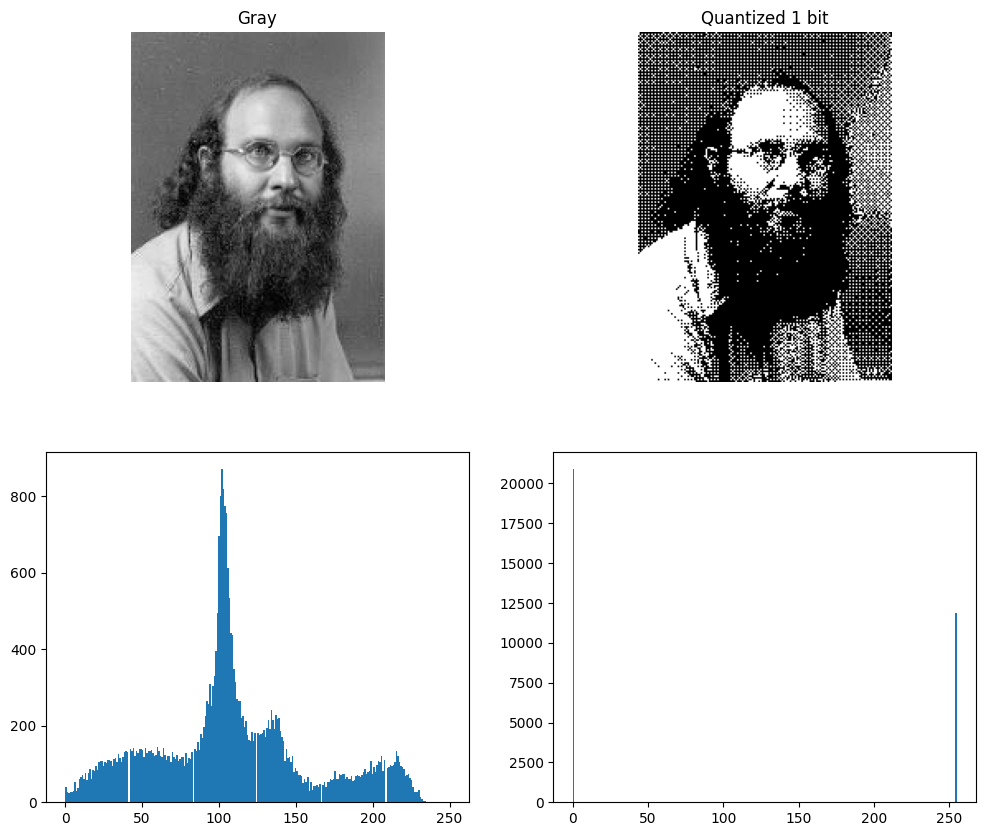

In [9]:
plt.figure(figsize=(12,10))


plt.subplot(2,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Quantized 1 bit')
plt.axis('off')


plt.subplot(2,2,3)
_=plt.hist(gray_image.ravel(), bins=256)

plt.subplot(2,2,4)
_=plt.hist(quantized_image.ravel(), bins=256)

cv2.imwrite(f'images/gray_{img_source}.png',gray_image)
cv2.imwrite(f'images/ordered_dith_gray_{img_source}.png',quantized_image)

## Error Diffusion - Floyd-Steinberg Algorithm

[[0.50588235 0.48235294 0.45490196 ... 0.47843137 0.48235294 0.4745098 ]
 [0.         1.         0.         ... 1.         0.         0.62601175]
 [1.         0.         1.         ... 1.         0.         0.7690891 ]
 ...
 [1.         0.         1.         ... 1.         0.         0.39628519]
 [1.         1.         1.         ... 1.         0.         0.57537295]
 [0.67666525 0.59483707 0.7028369  ... 0.70971306 0.82785092 0.68840262]]


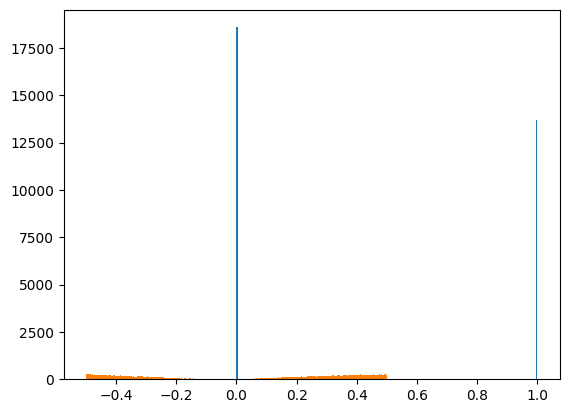

In [10]:
level = 2
# treshold = 127

image = cv2.imread(img_source)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def trunc(val, level):
    palette = np.zeros(256)
    palette[127:] = 255
    # nearest_palette_pixel = int(val // 255)
    # print(nearest_palette_pixel)
    return np.round(val/(level-1))*(level-1)

def get_image(level, input):
    
    alpha, delta, gamma, beta = 7/16, 1/16, 5/16, 3/16
    # old_pixel = input.copy()
    pixels = input.copy() /255
    newpixels = []
    q_ers = []
    for x in range(1, pixels.shape[0]-1):
        for y in range(pixels.shape[1]-1):
            oldpixel = pixels[x][y]
            newpixel = trunc(oldpixel, level)
            newpixels.append(newpixel)
            pixels[x][y] = newpixel
            quant_error = oldpixel - newpixel
            q_ers.append(quant_error)
            pixels[x][y+1] += quant_error *alpha
            pixels[x+1][y-1] += quant_error *beta
            pixels[x+1][y] += quant_error *gamma
            pixels[x+1][y+1] += quant_error *delta

    _=plt.hist(np.array(newpixels).ravel(), bins=256)
    _=plt.hist(np.array(q_ers).ravel(), bins=256)
    print(pixels)
    return pixels/np.max(pixels, axis=(0,1)) * 255
 
quantized_image = get_image(2, gray_image)



False

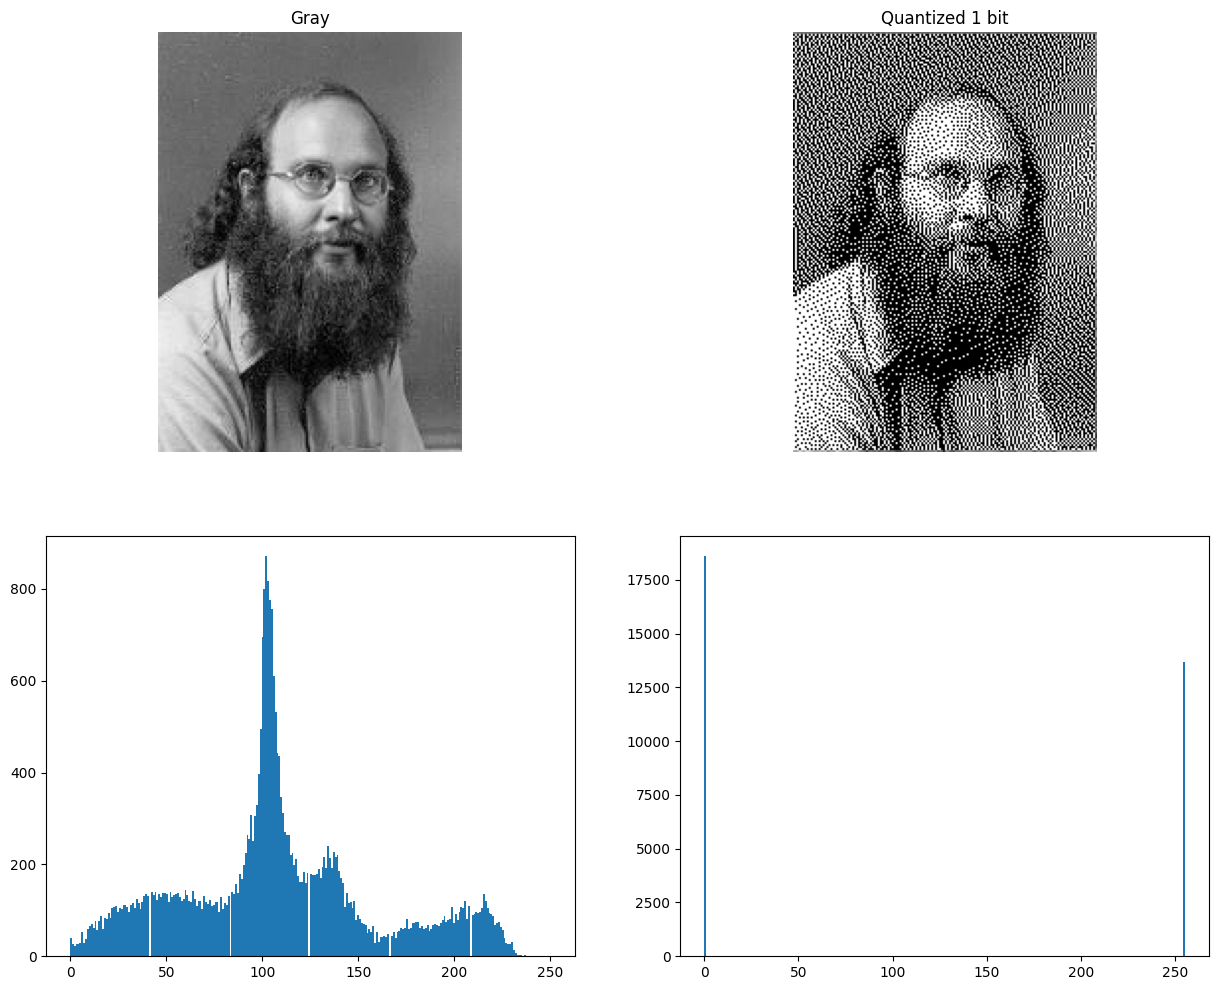

In [11]:
plt.figure(figsize=(15,12))


plt.subplot(2,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Quantized 1 bit')
plt.axis('off')


plt.subplot(2,2,3)
_=plt.hist(gray_image.ravel(), bins=256)

plt.subplot(2,2,4)
_=plt.hist(quantized_image.ravel(), bins=256)

cv2.imwrite(f'images/err_dif_dith_gray_{img_source}.png',quantized_image)


# Sources
>Median cut:
> - https://web.archive.org/web/20190202154003/http://www.leptonica.com/papers/mediancut.pdf
> - https://www.researchgate.net/publication/26339916_Optimal_image_quantization_perception_and_the_median_cut_algorithm
>
>Ordered:
> - https://www.cs.princeton.edu/courses/archive/fall00/cs426/lectures/dither/dither.pdf
> - https://en.wikipedia.org/wiki/Ordered_dithering
> - https://medium.com/the-bkpt/dithered-shading-tutorial-29f57d06ac39

---
## Plan
Quantization:
  - Uniform Quantization
  - Random dither
  - Ordered dither using Bayer's matrix
  - Floyd-Steinberg dither